In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def initialize_parameters(lenw):
    w = np.random.randn(1, lenw)
    b = 0
    return w, b

In [3]:
def forward_prop(X, w, b):
    z = np.dot(w, X) + b
    return z 

In [4]:
def cost_function(z, y):
    m = y.shape[1] 
    J = (1/(2*m))*np.sum(np.square(z-y))
    return J

In [5]:
def back_prop(X, y, z):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(dz, X.T)
    db = np.sum(dz)
    return dw, db

In [6]:
def gradient_descent_update(w, b, dw, db, learning_rate):
    w = w - learning_rate*dw 
    b = b - learning_rate*db 
    return w, b
    

In [7]:
def linear_regression_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    lenw = X_train.shape[0]
    w,b = initialize_parameters(lenw)
    
    costs_train = []
    
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]
    
    for i in range(1, epochs+1):
        z_train = forward_prop(X_train, w, b)
        cost_train = cost_function(z_train, y_train)
        dw, db = back_prop(X_train, y_train, z_train)
        w, b = gradient_descent_update(w,b,dw,db,learning_rate)
        
        # For plotting 
        if i%10==0:
            costs_train.append(cost_train)
        
        # MAE 
        MAE_train = (1/m_train)*np.sum(np.abs(z_train-y_train))
        
        z_val = forward_prop(X_val, w, b)
        cost_val = cost_function(z_val, y_val)
        MAE_val = (1/m_val)*np.sum(np.abs(z_val-y_val))
        
        print(f"Epochs {i} Training Cost {cost_train} Validation Cost {cost_val} MAE Cost {MAE_train} MAE Validation Cost {MAE_val}")
    
    plt.plot(costs_train)
    plt.xlabel('Iterations (per tens)')
    plt.ylabel('Training Cost')
    plt.title(f'Learning Rate {learning_rate}') 
    plt.show()
        

# **Testing the Model**

In [8]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [9]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston['data'].shape

(506, 13)

In [11]:
bost = pd.DataFrame(boston['data'])
bost.columns = boston['feature_names']
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X = (bost - bost.mean()) / (bost.max()-bost.min())

In [13]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-7.021173e-18,7.898820e-18,-7.828608e-16,-1.579764e-17,6.389268e-16,-1.544219e-15,-3.405269e-16,1.404235e-16,0.000000,2.808469e-17,-2.341561e-15,1.976460e-15,-1.088282e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,0.378576,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-0.371713,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-0.241279,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-0.197800,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,0.628287,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,0.628287,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01


In [14]:
y = boston['target']
y.shape

(506,)

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 5)
X_train.shape

(339, 13)

In [17]:
# Since our model wants number of features X number of training examples 
X_train = X_train.T 
X_train.shape

(13, 339)

In [18]:
y_train = np.array([y_train])
y_train.shape 

(1, 339)

In [19]:
X_val = X_val.T
X_val.shape

(13, 167)

In [20]:
y_val = np.array([y_val])
y_val.shape

(1, 167)

Epochs 1 Training Cost 295.5811648299049 Validation Cost 135.94857949286455 MAE Cost 22.544614431468503 MAE Validation Cost 13.58017579753737
Epochs 2 Training Cost 127.98242305119216 Validation Cost 74.55699352828009 MAE Cost 13.570801742610271 MAE Validation Cost 8.62684710121171
Epochs 3 Training Cost 66.18756775166747 Validation Cost 51.277927722469045 MAE Cost 8.621196851946568 MAE Validation Cost 6.470473350209418
Epochs 4 Training Cost 42.824234798348456 Validation Cost 41.980826709989934 MAE Cost 6.239472645741919 MAE Validation Cost 5.726063330758035
Epochs 5 Training Cost 33.54603221827045 Validation Cost 37.909885538577676 MAE Cost 5.296649143256529 MAE Validation Cost 5.480158832860361
Epochs 6 Training Cost 29.518527116992402 Validation Cost 35.85848541470089 MAE Cost 5.064038094164178 MAE Validation Cost 5.483418369653037
Epochs 7 Training Cost 27.51065879537652 Validation Cost 34.631814520183156 MAE Cost 5.014908499831663 MAE Validation Cost 5.501932333425528
Epochs 8 Tr

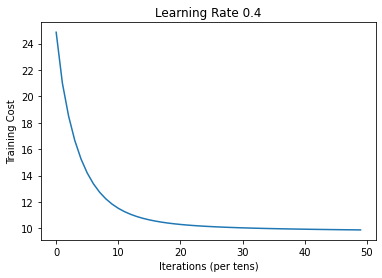

In [21]:
linear_regression_model(X_train, y_train, X_val, y_val, 0.4, 500)